<a href="https://colab.research.google.com/github/Pooja-Dalwani/PlayStoreAppReviewAnalysisEDA/blob/main/Capstone_Project_PlayStoreAppReviewAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In this era of rapidly growing technology, we have an app to cater to basically every need of ours. From stock market to food delivery, they have got us covered. Whether you need to travel, invest, track your expenses, maintain a healthy lifestyle, or simply entertain yourself, there is an app for everything. Their importance can't be overstated.

These needs are fulfilled by various businesses. A business can benefit largely in terms of loyalty, and increased customer engagement through an app. Now, as per growing needs, there is a surge in the number of apps and categories. Currently, as of 2022, Google Play Store is the biggest store with 33 categories, and total 3.48 million apps to offer. Now that's a lot, but not all of them survive the competition. 

What we have here, are two datasets: 1) Apps and their information 2) App Reviews, from Google Play Store, and our aim is to explore the factors on which the success of an app depends. The sequence in which we shall go about it are:



1.   **Data cleaning**
2.   **Exploration and Analysis**
3. **Inferences and conclusion**

Without further ado, let's begin!

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from io import StringIO

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Creating a common path
path = '/content/drive/MyDrive/Capstone Project - 1/'

In [4]:
# Creating dataframes for both data sets
playstore_df = pd.read_csv(path + 'Copy of Play Store Data.csv')
reviews_df = pd.read_csv(path + 'Copy of User Reviews.csv')

In [5]:
# Storing the playstore dataset into a temporary variable
temp_df = playstore_df

In [6]:
temp_df.shape

(10841, 13)

In [7]:
temp_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


So now we know that the data set contains a total of **10481** rows and **13** columns. And the various columns are:



1.   **App** - The name of the app 
2.   **Category** - The category a particular app belongs to, e.g., 'Game', 'Travel and local', 'Dating' etc.
3. **Rating** - Rating is an average of user ratings given at that time when this data was extracted.
4. **Reviews** - Count of number of reviews received by an app.
5. **Size** - The space an app will occupy in your storage if you install it.
6. **Installs** - Number of times an app has been downloaded since its launch.
7. **Price** - The amount you have to pay if you purchase the app. 
8. **Type** - Whether it's a free or paid app.
9. **Content Rating** - An indication of that age-group for which the content of an app is suitable for. e.g., some content are rated as "X" meaning no one under 17 years of age is allowed.
10. **Genre** - Similar to category
11. **Last updated** - The date when new additions/features were introduced in the app.
12. **Current version** - Version of the app being used
13. **Android version** - That minimum version of your andriod device, which is required for an app to perform well.

Having been familiarized with the data set a bit, let's begin our journey.

## 1. Data cleaning

In this step we are going to:


>(i) Remove unnecessary columns and rows<br>
(ii)  Check the data type of variables and if required convert them<br>
(iii) Remove dupplicate and repetative entries if any<br>
(iv) Treat null values

For this, let us first check the unique values in concerned variables.

In [8]:
temp_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
temp_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [10]:
temp_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
temp_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [12]:
temp_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [13]:
# Checking the datatype of variables
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Here we can see that "Reviews", "Size", "Installs", "Price", and "Last Updated" are of data-type string, and to perform necessary analysis we will have to convert them into numeric and date as required.

In [14]:
# Extracting the row with element '1.9' in Category column 
temp_df[(temp_df['Category'] == '1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In the above cell we can see that 'Category' is missing an element and so subsequent elements have shifted towards left so we are going to remove the row altogether.

In [15]:
temp_df.drop(10472,axis=0,inplace=True)

In [16]:
#For 'Reviews'
temp_df['Reviews'] = temp_df['Reviews'].astype(int)

#For 'Installs'
temp_df['Installs'] = temp_df['Installs'].str.replace(',','')
temp_df['Installs'] = temp_df['Installs'].str.replace('+','')
temp_df['Installs'] = temp_df['Installs'].astype(int)

#For 'Price'
temp_df['Price'] = temp_df['Price'].str.replace('$','')
temp_df['Price'] = temp_df['Price'].astype(float)

#For 'Sizes'
temp_df['Size'].replace("Varies with device","0",inplace = True)

sizes_list = temp_df['Size']

list_of_new_sizes = []
for size in sizes_list:
  if '0' in size:
    size = float(0)   
  elif 'k' in size:
    size = size.replace('k', '')
    size = float(size)
    size = size/1024
  elif 'M' in size:
    size = size.replace('M', '')  
    size = float(size)
  
  list_of_new_sizes.append(size)

#For 'Last Updated'
temp_df['Last Updated'] = pd.to_datetime(temp_df['Last Updated'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [17]:
#Checking for duplicate entries
temp_df.duplicated().sum()

483

In [18]:
#Removing duplicates and checking the shape of new dataframe
temp_df = temp_df.drop_duplicates().reset_index(drop=True)
temp_df.shape

(10357, 13)

Now let us ensure that one app should have one row/observation only. After removing duplicates, we have left **10357** rows, which means number of unique apps should also be the same. Let's find out.

In [19]:
# Checking number of unique apps
temp_df['App'].nunique()

9659

Number of unique apps in the dataset are **9659** but still there are 698 extra entries. Let's find out what is leading us to this discrepancy.

In [20]:
temp_df['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [21]:
temp_df.loc[temp_df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1446,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1494,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1538,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1625,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1653,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1786,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1857,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1956,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4072,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [22]:
temp_df.loc[temp_df['App'] == 'ROBLOX']['Reviews'].max()


4450890

Here we can see that there are many apps having multiple entries even after removing duplicates such as 'ROBLOX'. After observation we found that these entries differ in terms of number of reviews. These must have been from different points of time. We are going to keep only **that row which has highest number of reviews**, assuming it to be the latest one. 

In [23]:
#Keeping only that row for each app which has the highest number of reviews
temp_df = temp_df.loc[temp_df.groupby('App')['Reviews'].idxmax(),:]
temp_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8403,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500,Free,0.00,Everyone,Sports,2017-10-07,0.22,4.1 and up
8061,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,1000000,Free,0.00,Everyone,Social,2018-08-02,5.03,4.1 and up
291,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,10000,Free,0.00,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up
4086,.R,TOOLS,4.5,259,203k,10000,Free,0.00,Everyone,Tools,2014-09-16,1.1.06,1.5 and up
4181,/u/app,COMMUNICATION,4.7,573,53M,10000,Free,0.00,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,100000,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0.7,4.0.3 and up
3908,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
2277,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,1000000,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3 and up
7090,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,10000,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2 and up


Now we can see that number of rows of data set is equal to number of unique apps.i.e., 9659.

In [24]:
#Checking for null values
temp_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Current version and android version do not huave much relevance when it comes to analysis. Hence we are going to treat Rating and Type only.

In [25]:
#Replacing null values with the median of Ratings
temp_df['Rating'].fillna((temp_df['Rating'].median()), inplace=True)

In [26]:
#Extracting the row with null value in Type column
temp_df[temp_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8667,Command & Conquer: Rivals,FAMILY,4.3,0,0,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


Since this row does not have much information in other aspects too, we are going to remove it.

In [27]:
temp_df.drop(8667,axis=0,inplace=True)

In [28]:
#Now let us check again
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 8403 to 772
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9658 non-null   object        
 1   Category        9658 non-null   object        
 2   Rating          9658 non-null   float64       
 3   Reviews         9658 non-null   int64         
 4   Size            9658 non-null   object        
 5   Installs        9658 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9658 non-null   float64       
 8   Content Rating  9658 non-null   object        
 9   Genres          9658 non-null   object        
 10  Last Updated    9658 non-null   datetime64[ns]
 11  Current Ver     9650 non-null   object        
 12  Android Ver     9656 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


As we can see that all the necessary variables have been converted into correct datatypes, and null values imputated.



### Let us have a look at the Reviews dataset for the same

In [29]:
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


As we can see that this dataframe contains four columns:

1. **App** - Name of the app
2. **Translated Review** - Various textual reviews given by users.
3. **Sentiment** - It indicates the overall emotion of a particular user review. It can be identified either as positive, negative, or neutral.
4. **Sentiment Polarity** - Polarity is simply a numeric representation of the overall sentiment. It gives us the degree of an emotion. If the review is negative, how much negative it is, and similar for positive emotion. This number can lie between -1 and 1. "-" sign representing a negative emotion and "+" sign a positive emotion. 
5. **Sentiment Subjectivity** - This gives us a measure of the subjectivity or objectivity of a particular statement/review. A review will be considered as subjective when it is more of a personal opinion (which can differ from person to person), and it can be considered objective when the review is more of a fact rather than opinion (it cannot change from person to person). This number can lie anywhere between 0 and 1. If the number is near 1 (i.e. greater than 0.5) it means that the statement is more of an opinion. If it less than 0.5, it means the statement is a fact. 

In [30]:
#Checking for null values
reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

We are going to remove those rows which have missing 'Translated_Review'.

In [31]:
#Keeping only non-null rows
reviews_df = reviews_df[~reviews_df['Translated_Review'].isnull()]
reviews_df.shape

(37427, 5)

In [32]:
#Checking for duplicates
reviews_df.duplicated().sum()

7735

In [33]:
#Removing duplicates
reviews_df = reviews_df.drop_duplicates().reset_index(drop=True)
reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
29687,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
29688,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
29689,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
29690,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [34]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


## 2. Exploration and Analysis

Among the features available, an app's success can be best defined by the number of installs it has. So in this case our independent variable is **'Intsalls'**. Now we have to explore and see that, the install of an app depends on which features e.g., size, rating, type etc. 

Text(0, 0.5, 'Number of Apps')

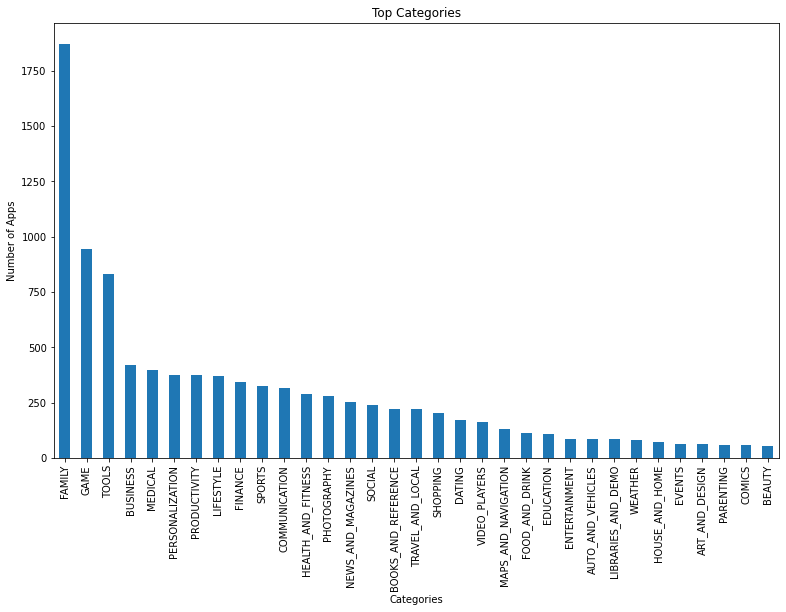

In [35]:
x = temp_df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (13,8)
x.plot(kind='bar')
plt.title('Top Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Apps')

In the above figure we can see that the categories 'Family', 'Game', and 'Tools' have topped the list. They have maximum number of apps to offer on Play Store compared to any other category. And, the least number of apps offered are by categories 'Beauty', 'Comics', and 'Parenting'.

Text(0, 0.5, 'Number of Installs')

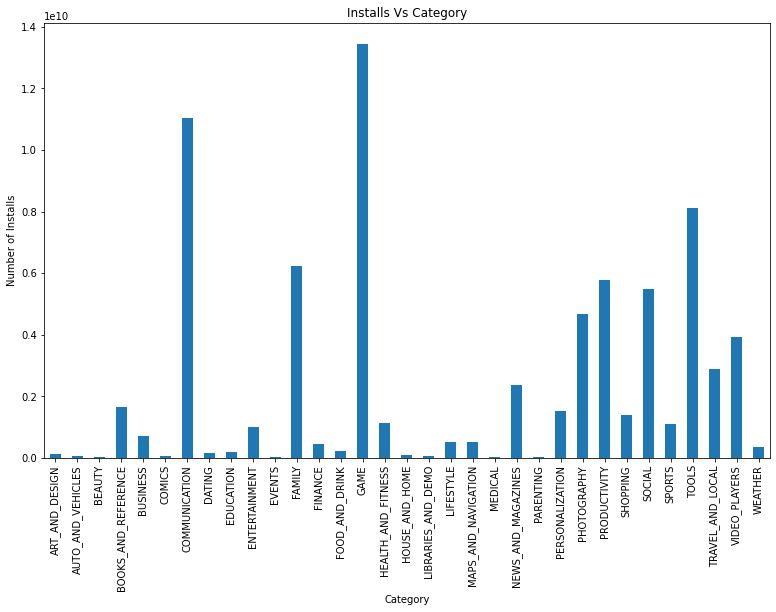

In [36]:
my_df = temp_df.groupby(['Category'])['Installs'].sum()
my_df.sort_values(ascending=False)
my_df.plot(kind='bar')
plt.title('Installs Vs Category')
plt.xlabel('Category')
plt.ylabel('Number of Installs')

When it comes to which categories have highest number of installs, the answer is a little bit different from the previous analysis. In this case, 'Game', and 'Communication' have topped the list. They have more number of installs compared to any other category. 




In [37]:
no_of_apps = [387,1972,1144,283,335,424,295,843,258,175]
no_of_installs = [32647276251,10258263505,35086024415,7496317760,10088247655,14176091369,14069867902,11452771915,6868887146,6222002720]
index = ['COMMUNICATION','FAMILY','GAME','NEWS_AND_MAGAZINES','PHOTOGRAPHY','PRODUCTIVITY','SOCIAL','TOOLS','TRAVEL_AND_LOCAL','VIDEO_PLAYERS']
df = pd.DataFrame({'No.of Apps': no_of_apps,
                   'Installs': no_of_installs}, index=index)
df

,No.of Apps,Installs
COMMUNICATION,387,32647276251
FAMILY,1972,10258263505
GAME,1144,35086024415
NEWS_AND_MAGAZINES,283,7496317760
PHOTOGRAPHY,335,10088247655
PRODUCTIVITY,424,14176091369
SOCIAL,295,14069867902
TOOLS,843,11452771915
TRAVEL_AND_LOCAL,258,6868887146
VIDEO_PLAYERS,175,6222002720


Text(0, 0.5, 'Count')

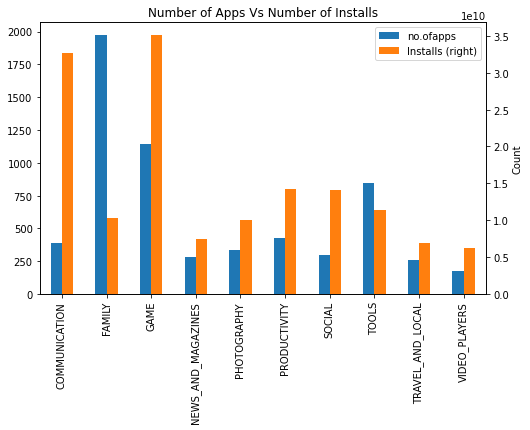

In [38]:
plt.rcParams['figure.figsize'] = (8,5)
s = StringIO("""     no.ofapps     Installs
COMMUNICATION     387   32647276251
FAMILY    1972  10258263505
GAME     1144  35086024415
NEWS_AND_MAGAZINES     283   7496317760
PHOTOGRAPHY    335   10088247655
PRODUCTIVITY     424   14176091369
SOCIAL     295   14069867902
TOOLS     843   11452771915
TRAVEL_AND_LOCAL     258   6868887146
VIDEO_PLAYERS     175   6222002720""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)
_ = df.plot( kind= 'bar' , secondary_y= 'Installs')
plt.title('Number of Apps Vs Number of Installs')
plt.ylabel('Count')

A better way to compare number of apps vs installs is the above bar graph. 
As indicated, blue bars on the left represent number of apps offered by a category, and the orange bar represents number of installs under that same category.

Although, there are a variety of apps found in 'Family' Category, the installs are very less compared to other apps. Similarly, there are lesser number of apps offered under 'Game', and 'Communication' their installs have sky-rocketed.

We can see that the ratio of Number of Installs/Number of Apps is highest in the case of "Communication". So when utility is concerned, 'Communication' is the best category. More number of apps can be created in this arena.